# Mobility Attack Numero Uno

This notebook is an attempt to carry out a trajectory reconstruction attack based on the upload patterns of a particular sensor. We use `simulation/smol_attacks/visualizing_success.ipynb` to inform our decisions.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
sensor_path = "../smol_truth/sensors.csv"
with open(sensor_path) as sensor_file:
    sensors = pd.read_csv(sensor_file)

In [3]:
sim_path = "../smol_sim/mules/167.csv"
with open(sim_path) as sim_file:
    sim = pd.read_csv(sim_file)

In [4]:
truth_path = "../smol_truth/mules/167.csv"
with open(truth_path) as truth_file:
    truth = pd.read_csv(truth_file)

In [5]:
sensors.head()

,sensor ID,x (m),y (m),radius (m)
0,0,231.2663,120.1813,11.131326
1,1,371.8589,238.2076,11.634567
2,2,757.0289,350.5063,15.115731
3,3,190.9400,140.1613,13.697470
4,4,663.1340,522.3010,14.227241


In [6]:
sim.head()

,sensor ID,norm_secs (secs),time (days)
0,38,2.801940,39584.456907
1,38,3.502425,39584.456916
2,38,4.202909,39584.456924
3,38,4.903394,39584.456932
4,38,5.603879,39584.456940


In [7]:
truth.head()

,x (m),y (m),norm_secs (secs),time (days)
0,799.331,576.358,0.000000,39584.456875
1,790.451,576.136,2.000004,39584.456898
2,781.349,575.470,4.000000,39584.456921
3,772.358,573.583,5.999996,39584.456944
4,763.367,571.696,8.000001,39584.456968


In [21]:
# Downsample the simulation to only take a sample every 3-ish seconds
down_sim = sim.loc[(sim['norm_secs (secs)'].round() % 8) == 0]
down_sim.head()

,sensor ID,norm_secs (secs),time (days)
7,38,7.705334,39584.456964
8,38,8.405819,39584.456972
14,4,39.927640,39584.457337
25,7,72.149945,39584.457710
42,47,512.054467,39584.544329


In [22]:
t = []
sim_x = []
sim_y = []
sim_r = []

for index, row in down_sim.iterrows():
    t.append(row['norm_secs (secs)'])
    sim_x.append(sensors.iloc[int(row['sensor ID'])]['x (m)'])
    sim_y.append(sensors.iloc[int(row['sensor ID'])]['y (m)'])
    sim_r.append(sensors.iloc[int(row['sensor ID'])]['radius (m)'])

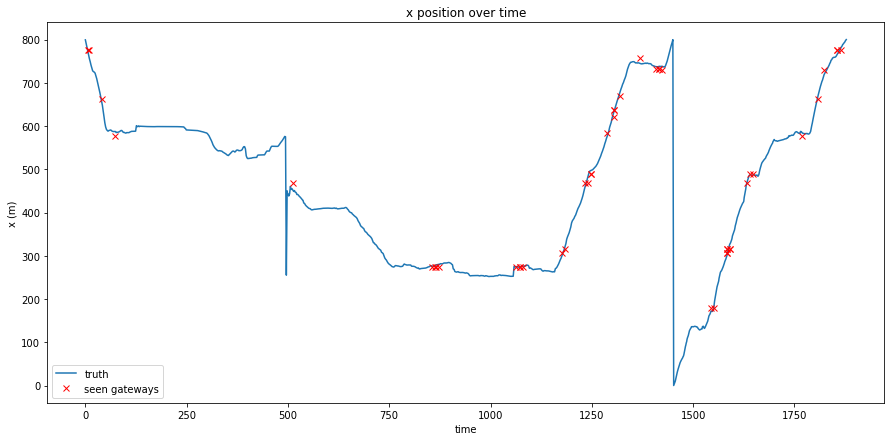

In [23]:
# plot x over time
plt.figure(figsize=(15, 7))
plt.title('x position over time')
plt.xlabel('time')
plt.ylabel('x (m)')
plt.plot(truth['norm_secs (secs)'], truth['x (m)'], label='truth')
plt.plot(t, sim_x, 'rx', label='seen gateways')
plt.legend()
plt.show()

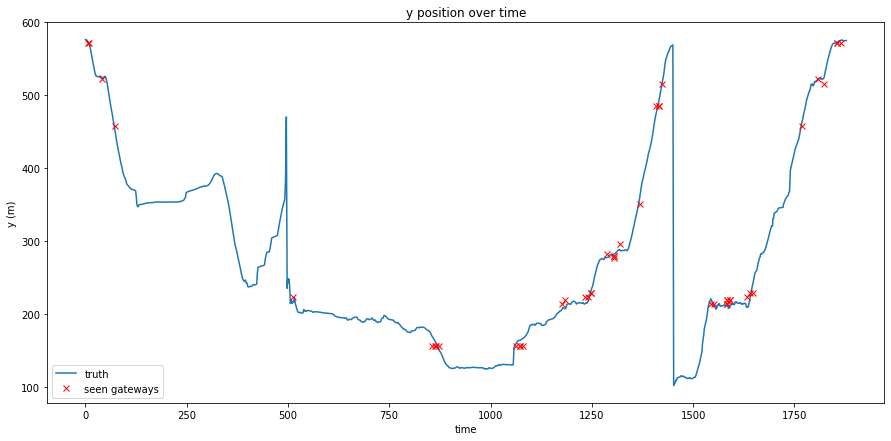

In [24]:
# plot y over time
plt.figure(figsize=(15, 7))
plt.title('y position over time')
plt.xlabel('time')
plt.ylabel('y (m)')
plt.plot(truth['norm_secs (secs)'], truth['y (m)'], label='truth')
plt.plot(t, sim_y, 'rx', label='seen gateways')
plt.legend()
plt.show()

In [25]:
# The goal is to spline. However, splines dont work well with multiple values
# at one point, which happens when we see multiple gateways at the same time.
# Thus, if we see multiple gateways at the same time, we average the positions.
ct = []
cx = []
cy = []

counter = 0
while counter < len(t):
    cur_t = t[counter]
    cum_x = [sim_x[counter]]
    cum_y = [sim_y[counter]]
    counter += 1
    while counter < len(t) and t[counter] == cur_t:
        cum_x.append(sim_x[counter])
        cum_y.append(sim_y[counter])
        counter += 1
    ct.append(cur_t)
    cx.append(sum(cum_x) / len(cum_x))
    cy.append(sum(cum_y) / len(cum_y))

In [26]:
from scipy.interpolate import interp1d

In [27]:
it = np.linspace(ct[0], ct[-1], num=100, endpoint=True)

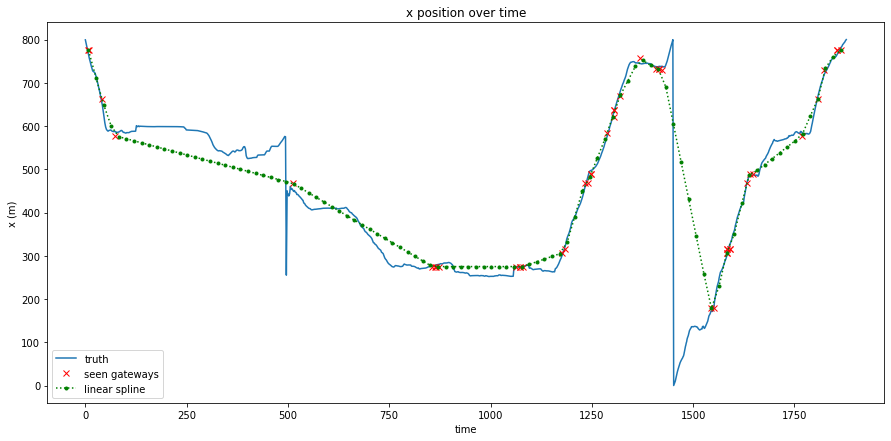

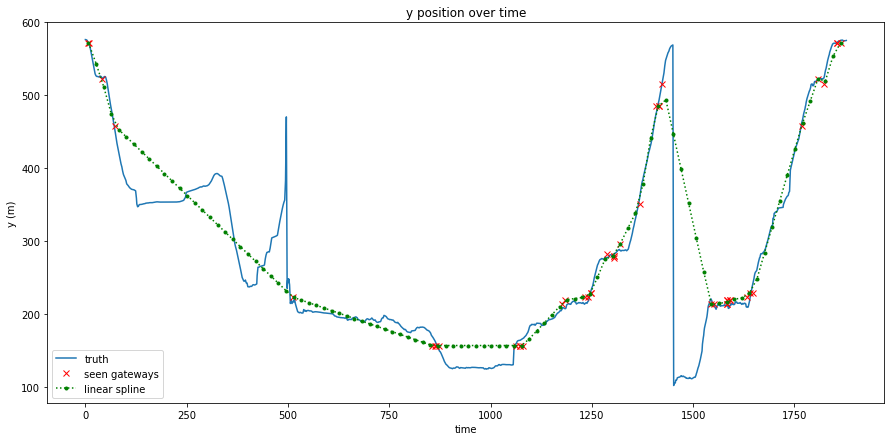

In [28]:
spline_type = 'linear'

fx = interp1d(ct, cx, kind=spline_type)
fy = interp1d(ct, cy, kind=spline_type)

ix = fx(it)
iy = fy(it)

# plot x over time
plt.figure(figsize=(15, 7))
plt.title('x position over time')
plt.xlabel('time')
plt.ylabel('x (m)')
plt.plot(truth['norm_secs (secs)'], truth['x (m)'], label='truth')
plt.plot(t, sim_x, 'rx', label='seen gateways')
plt.plot(it, ix, 'g.:', label='{} spline'.format(spline_type))
plt.legend()
plt.show()

# plot y over time
plt.figure(figsize=(15, 7))
plt.title('y position over time')
plt.xlabel('time')
plt.ylabel('y (m)')
plt.plot(truth['norm_secs (secs)'], truth['y (m)'], label='truth')
plt.plot(t, sim_y, 'rx', label='seen gateways')
plt.plot(it, iy, 'g.:', label='{} spline'.format(spline_type))
plt.legend()
plt.show()

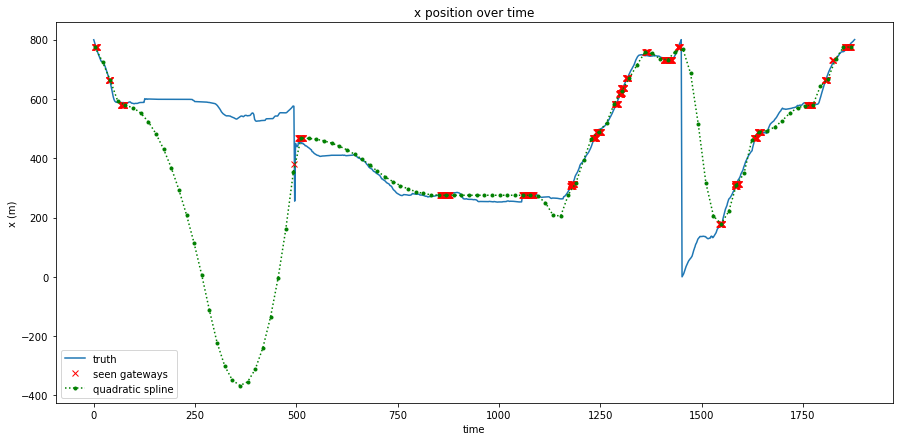

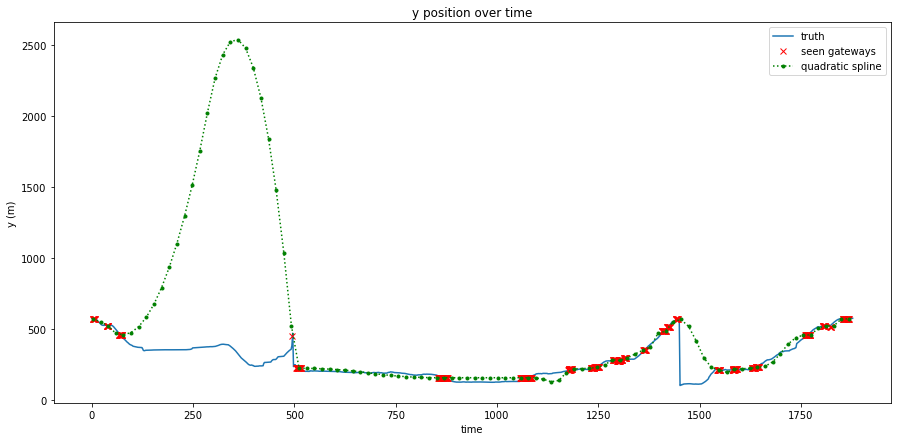

In [26]:
spline_type = 'quadratic'

fx = interp1d(ct, cx, kind=spline_type)
fy = interp1d(ct, cy, kind=spline_type)

ix = fx(it)
iy = fy(it)

# plot x over time
plt.figure(figsize=(15, 7))
plt.title('x position over time')
plt.xlabel('time')
plt.ylabel('x (m)')
plt.plot(truth['norm_secs (secs)'], truth['x (m)'], label='truth')
plt.plot(t, sim_x, 'rx', label='seen gateways')
plt.plot(it, ix, 'g.:', label='{} spline'.format(spline_type))
plt.legend()
plt.show()

# plot y over time
plt.figure(figsize=(15, 7))
plt.title('y position over time')
plt.xlabel('time')
plt.ylabel('y (m)')
plt.plot(truth['norm_secs (secs)'], truth['y (m)'], label='truth')
plt.plot(t, sim_y, 'rx', label='seen gateways')
plt.plot(it, iy, 'g.:', label='{} spline'.format(spline_type))
plt.legend()
plt.show()

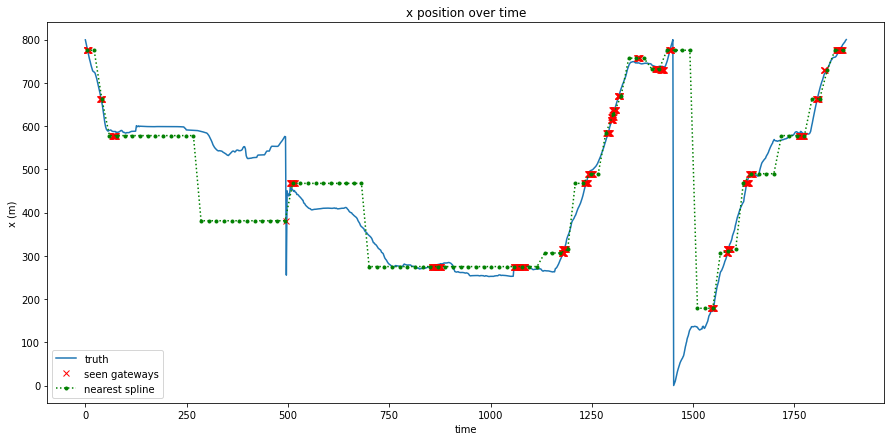

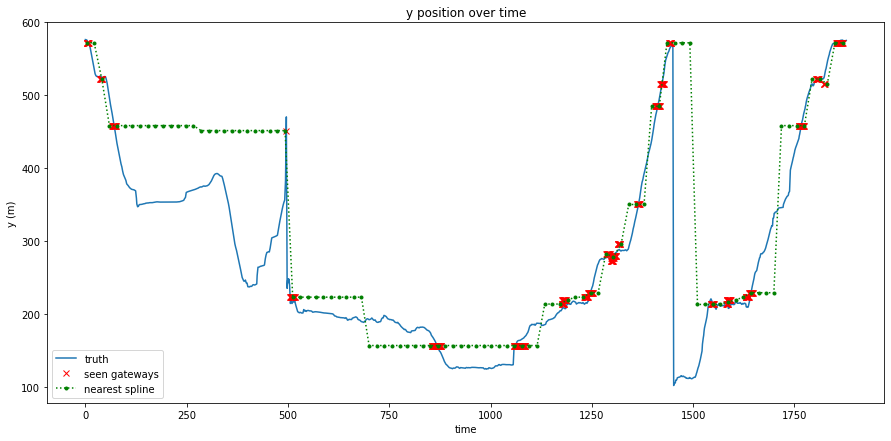

In [28]:
spline_type = 'nearest'

fx = interp1d(ct, cx, kind=spline_type)
fy = interp1d(ct, cy, kind=spline_type)

ix = fx(it)
iy = fy(it)

# plot x over time
plt.figure(figsize=(15, 7))
plt.title('x position over time')
plt.xlabel('time')
plt.ylabel('x (m)')
plt.plot(truth['norm_secs (secs)'], truth['x (m)'], label='truth')
plt.plot(t, sim_x, 'rx', label='seen gateways')
plt.plot(it, ix, 'g.:', label='{} spline'.format(spline_type))
plt.legend()
plt.show()

# plot y over time
plt.figure(figsize=(15, 7))
plt.title('y position over time')
plt.xlabel('time')
plt.ylabel('y (m)')
plt.plot(truth['norm_secs (secs)'], truth['y (m)'], label='truth')
plt.plot(t, sim_y, 'rx', label='seen gateways')
plt.plot(it, iy, 'g.:', label='{} spline'.format(spline_type))
plt.legend()
plt.show()

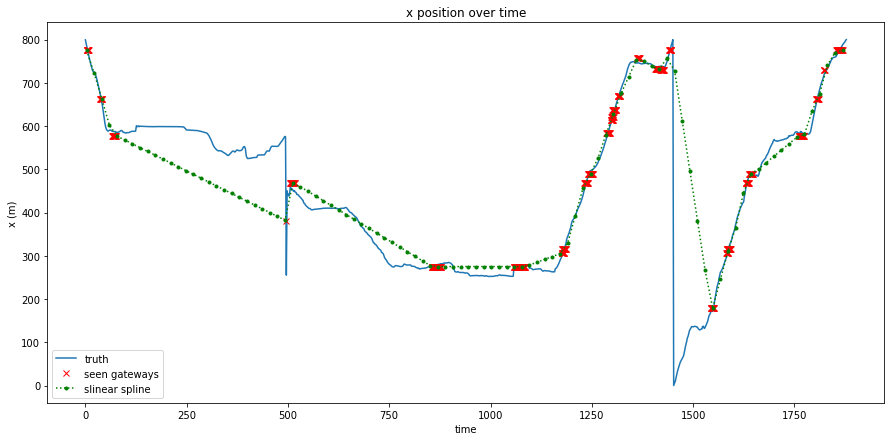

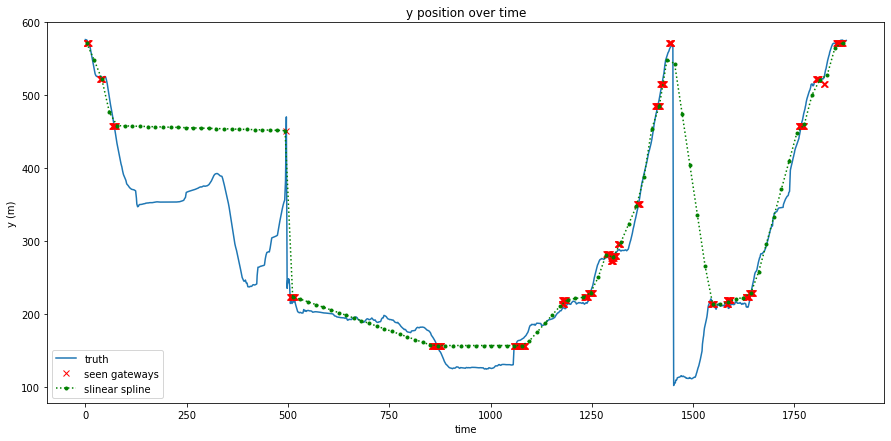

In [29]:
spline_type = 'slinear'

fx = interp1d(ct, cx, kind=spline_type)
fy = interp1d(ct, cy, kind=spline_type)

ix = fx(it)
iy = fy(it)

# plot x over time
plt.figure(figsize=(15, 7))
plt.title('x position over time')
plt.xlabel('time')
plt.ylabel('x (m)')
plt.plot(truth['norm_secs (secs)'], truth['x (m)'], label='truth')
plt.plot(t, sim_x, 'rx', label='seen gateways')
plt.plot(it, ix, 'g.:', label='{} spline'.format(spline_type))
plt.legend()
plt.show()

# plot y over time
plt.figure(figsize=(15, 7))
plt.title('y position over time')
plt.xlabel('time')
plt.ylabel('y (m)')
plt.plot(truth['norm_secs (secs)'], truth['y (m)'], label='truth')
plt.plot(t, sim_y, 'rx', label='seen gateways')
plt.plot(it, iy, 'g.:', label='{} spline'.format(spline_type))
plt.legend()
plt.show()

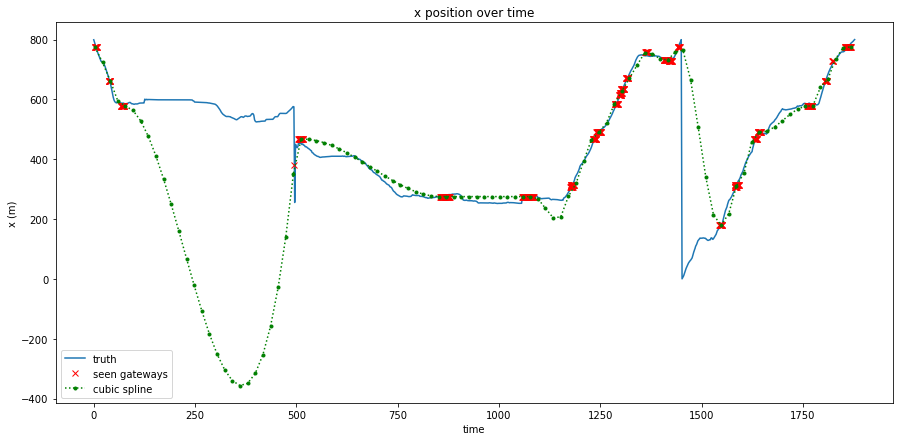

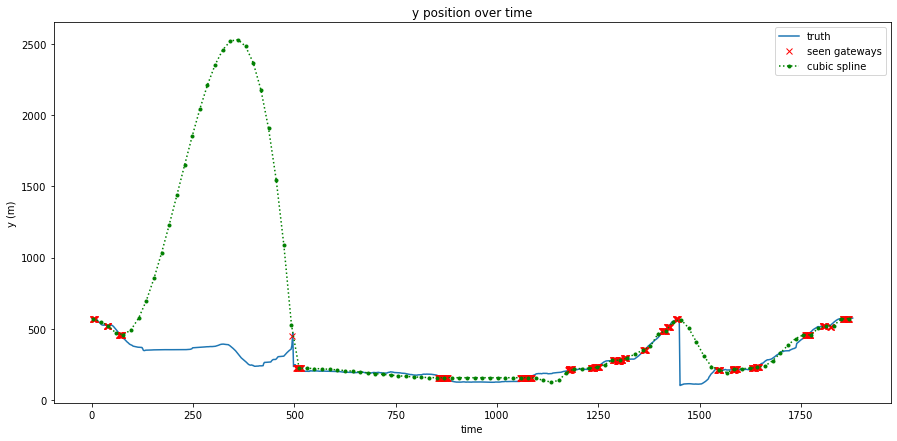

In [30]:
spline_type = 'cubic'

fx = interp1d(ct, cx, kind=spline_type)
fy = interp1d(ct, cy, kind=spline_type)

ix = fx(it)
iy = fy(it)

# plot x over time
plt.figure(figsize=(15, 7))
plt.title('x position over time')
plt.xlabel('time')
plt.ylabel('x (m)')
plt.plot(truth['norm_secs (secs)'], truth['x (m)'], label='truth')
plt.plot(t, sim_x, 'rx', label='seen gateways')
plt.plot(it, ix, 'g.:', label='{} spline'.format(spline_type))
plt.legend()
plt.show()

# plot y over time
plt.figure(figsize=(15, 7))
plt.title('y position over time')
plt.xlabel('time')
plt.ylabel('y (m)')
plt.plot(truth['norm_secs (secs)'], truth['y (m)'], label='truth')
plt.plot(t, sim_y, 'rx', label='seen gateways')
plt.plot(it, iy, 'g.:', label='{} spline'.format(spline_type))
plt.legend()
plt.show()

Tbh seems like a linear spline works the best lmao, especially when there's a period of no upload. Any higher-order things try way too hard and end up far off target.

In [29]:
spline_type = 'linear'
fx = interp1d(ct, cx, kind=spline_type)
fy = interp1d(ct, cy, kind=spline_type)

tt = truth.loc[(truth['norm_secs (secs)'] > ct[0]) & 
               (truth['norm_secs (secs)'] < ct[-1])]['norm_secs (secs)'].to_numpy()
# predict points based on a linear spline
px = fx(tt)
py = fy(tt)

# calculate the Euclidean error of the prediction
err = []
for i in range(len(tt)):
    ex = px[i] - truth.loc[truth['norm_secs (secs)'] == tt[i]].iloc[0]['x (m)']
    ey = py[i] - truth.loc[truth['norm_secs (secs)'] == tt[i]].iloc[0]['y (m)']
    err.append(np.linalg.norm([ex, ey]))


[]

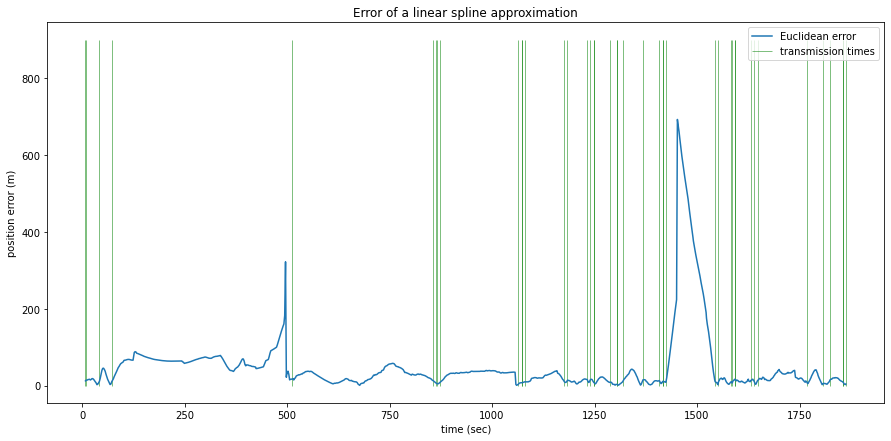

In [32]:
# plot the error over time
plt.figure(figsize=(15, 7))
plt.title("Error of a linear spline approximation")
plt.xlabel('time (sec)')
plt.ylabel('position error (m)')
plt.plot(tt, err, label="Euclidean error")
plt.vlines(ct, 0, 900, label="transmission times", colors='g', linewidths=0.5)
plt.legend()
plt.plot()

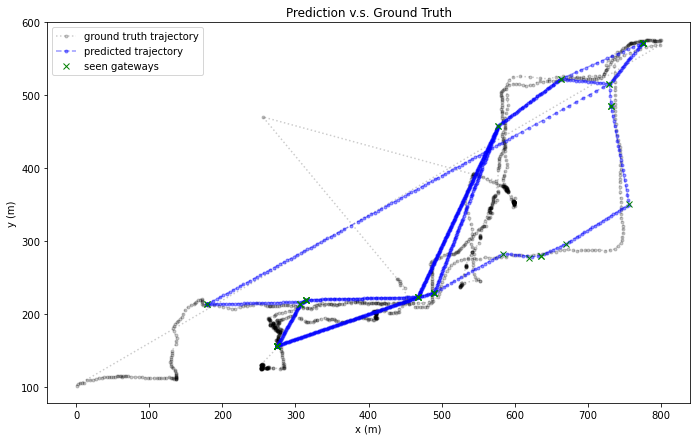

In [33]:
# plot the trajectories v.s. the prediction
plt.figure(figsize=(15, 7))
plt.gca().set_aspect("equal")
plt.title("Prediction v.s. Ground Truth")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.plot(truth['x (m)'], truth['y (m)'], 'k.:', label="ground truth trajectory", alpha=0.2)
plt.plot(px, py, 'b.--', label="predicted trajectory", alpha=0.4)
plt.plot(sim_x, sim_y, 'gx', label='seen gateways')
plt.legend()
plt.show()

In [34]:
sum(tt < 1400)


701

In [41]:
sum([item < 1400 for item in t])

25

In [36]:
sum(tt < 1550)

823

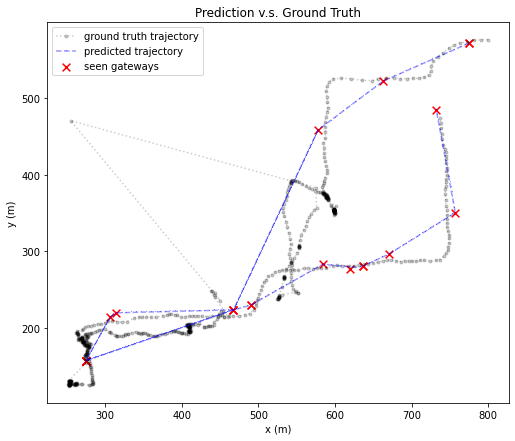

In [63]:
# plot the trajectories v.s. the prediction
plt.figure(figsize=(15, 7))
plt.gca().set_aspect("equal")
plt.title("Prediction v.s. Ground Truth")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.plot(truth['x (m)'][:710], truth['y (m)'][:710], 'k.:', label="ground truth trajectory", alpha=0.2)
plt.plot(px[:710], py[:710], 'b,--', label="predicted trajectory", alpha=0.4)
plt.scatter(sim_x[:26], sim_y[:26], s=60, c='r', marker='x', label='seen gateways')
plt.legend()
plt.show()

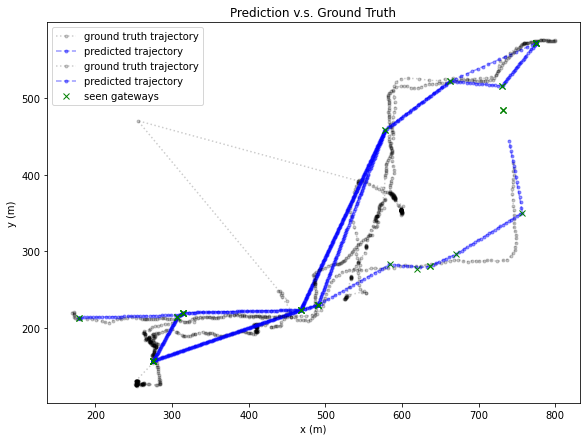

In [38]:
# plot the trajectories v.s. the prediction
plt.figure(figsize=(15, 7))
plt.gca().set_aspect("equal")
plt.title("Prediction v.s. Ground Truth")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.plot(truth['x (m)'][:700], truth['y (m)'][:700], 'k.:', label="ground truth trajectory", alpha=0.2)
plt.plot(px[:700], py[:700], 'b.--', label="predicted trajectory", alpha=0.4)
plt.plot(truth['x (m)'][820:], truth['y (m)'][820:], 'k.:', label="ground truth trajectory", alpha=0.2)
plt.plot(px[820:], py[820:], 'b.--', label="predicted trajectory", alpha=0.4)
plt.plot(sim_x, sim_y, 'gx', label='seen gateways')
plt.legend()
plt.show()

## Do everything together

Here we have a function to do all of the stuff above in one go, so we can see how well it works on other paths.

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

# Do the same thing again for other sensors.
def path_prediction(mobile_id='167', sample_period=8, spline_type='linear'):
    # Read in data.
    sensor_path = "../smol_truth/sensors.csv"
    with open(sensor_path) as sensor_file:
        sensors = pd.read_csv(sensor_file)
    
    sim_path = "../smol_sim/mules/{}.csv".format(mobile_id)
    with open(sim_path) as sim_file:
        sim = pd.read_csv(sim_file)
    
    truth_path = "../smol_truth/mules/{}.csv".format(mobile_id)
    with open(truth_path) as truth_file:
        truth = pd.read_csv(truth_file)
    
    
    # Downsample the simulation.
    down_sim = sim.loc[(sim['norm_secs (secs)'].round() % sample_period) == 0]
    
    
    # Compile positions of seen gateways.
    t = []
    sim_x = []
    sim_y = []
    sim_r = []

    for index, row in down_sim.iterrows():
        t.append(row['norm_secs (secs)'])
        sim_x.append(sensors.iloc[int(row['sensor ID'])]['x (m)'])
        sim_y.append(sensors.iloc[int(row['sensor ID'])]['y (m)'])
        sim_r.append(sensors.iloc[int(row['sensor ID'])]['radius (m)'])
    
    
    # The goal is to spline. However, splines dont work well with multiple values
    # at one point, which happens when we see multiple gateways at the same time.
    # Thus, if we see multiple gateways at the same time, we average the positions.
    ct = []
    cx = []
    cy = []

    counter = 0
    while counter < len(t):
        cur_t = t[counter]
        cum_x = [sim_x[counter]]
        cum_y = [sim_y[counter]]
        counter += 1
        while counter < len(t) and t[counter] == cur_t:
            cum_x.append(sim_x[counter])
            cum_y.append(sim_y[counter])
            counter += 1
        ct.append(cur_t)
        cx.append(sum(cum_x) / len(cum_x))
        cy.append(sum(cum_y) / len(cum_y))
    
    
    # Calculate our predictions.
    fx = interp1d(ct, cx, kind=spline_type)
    fy = interp1d(ct, cy, kind=spline_type)
    tt = truth.loc[(truth['norm_secs (secs)'] > ct[0]) & 
                   (truth['norm_secs (secs)'] < ct[-1])]['norm_secs (secs)'].to_numpy()
    
    # Predict points based on a spline.
    px = fx(tt)
    py = fy(tt)

    # Calculate the Euclidean error of the prediction for each truth point.
    err = []
    for i in range(len(tt)):
        ex = px[i] - truth.loc[truth['norm_secs (secs)'] == tt[i]].iloc[0]['x (m)']
        ey = py[i] - truth.loc[truth['norm_secs (secs)'] == tt[i]].iloc[0]['y (m)']
        err.append(np.linalg.norm([ex, ey]))

    
    # Plot the results.
    # Set some parameters.
    truth_marker = 'k,:'
    truth_alpha = 0.4
    prediction_color = 'g'
    prediction_marker = 'g,:'
    prediction_alpha = 0.4
    error_marker = 'b,-'
    gateway_marker = 'rx'
    gateway_size = 10
    
    # Plot x over time.
    plt.figure(figsize=(15, 7))
    plt.title('X position of {} over time'.format(mobile_id))
    plt.xlabel('time (secs)')
    plt.ylabel('x (m)')
    plt.plot(truth['norm_secs (secs)'], truth['x (m)'], truth_marker, alpha=truth_alpha, label='truth')
    plt.plot(tt, px, prediction_marker, alpha=prediction_alpha, label='{} spline prediction'.format(spline_type))
    plt.plot(t, sim_x, gateway_marker, markersize=gateway_size, label='seen gateways')
    plt.legend()
    plt.show()
    
    # Plot y over time.
    plt.figure(figsize=(15, 7))
    plt.title('Y position of {} over time'.format(mobile_id))
    plt.xlabel('time (secs)')
    plt.ylabel('y (m)')
    plt.plot(truth['norm_secs (secs)'], truth['y (m)'], truth_marker, alpha=truth_alpha, label='truth')
    plt.plot(tt, py, prediction_marker, alpha=prediction_alpha, label='{} spline prediction'.format(spline_type))
    plt.plot(t, sim_y, gateway_marker, markersize=gateway_size, label='seen gateways')
    plt.legend()
    plt.show()
    
    # Plot the error over time.
    plt.figure(figsize=(15, 7))
    plt.title("Euclidean error of a {} spline approximation for {}".format(spline_type, mobile_id))
    plt.xlabel('time (sec)')
    plt.ylabel('error (m)')
    plt.plot(tt, err, error_marker, label="Euclidean error")
    plt.vlines(ct, 0, 900, colors=prediction_color, alpha=prediction_alpha, label="transmission times")
    plt.legend()
    plt.plot()
    
    # Plot the trajectories v.s. the prediction
    plt.figure(figsize=(15, 7))
    plt.gca().set_aspect("equal")
    plt.title("Prediction v.s. Ground Truth for {}".format(mobile_id))
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.plot(truth['x (m)'], truth['y (m)'], truth_marker, label="ground truth trajectory", alpha=truth_alpha)
    plt.plot(px, py, prediction_marker, alpha=prediction_alpha, label="predicted trajectory")
    plt.plot(sim_x, sim_y, gateway_marker, markersize=gateway_size, label='seen gateways')
    plt.legend()
    plt.show()

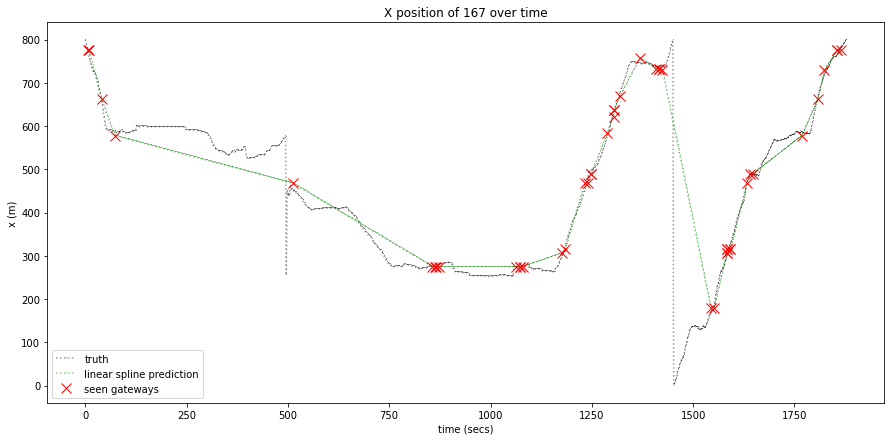

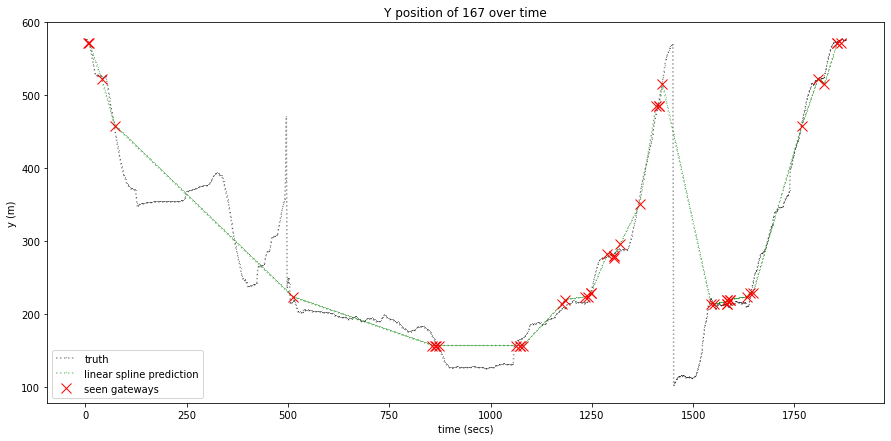

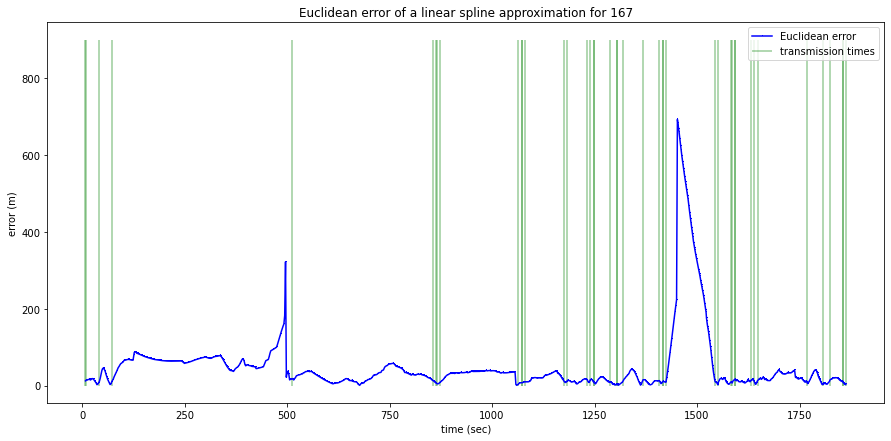

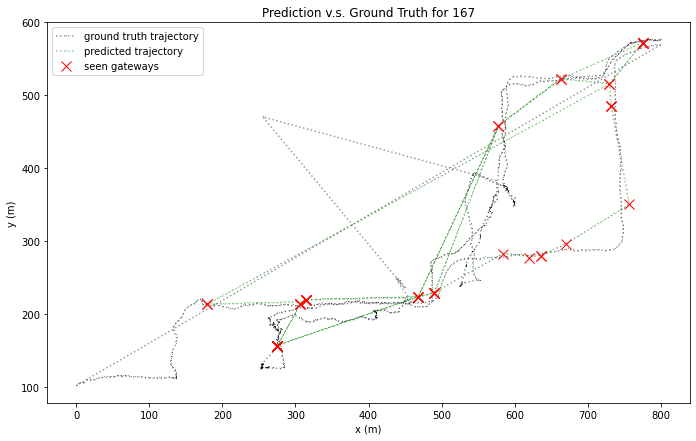

In [78]:
# Hope this works!
path_prediction()

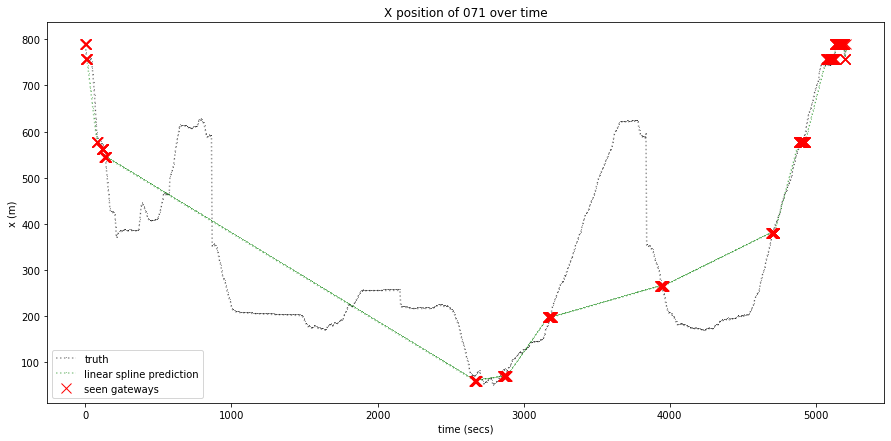

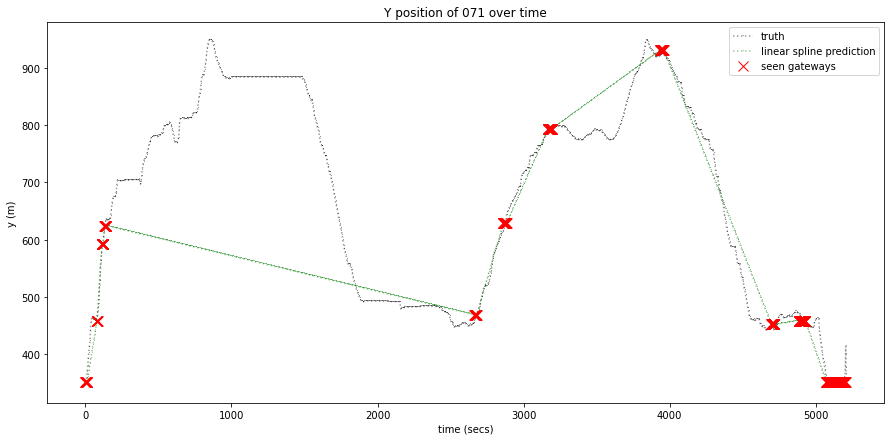

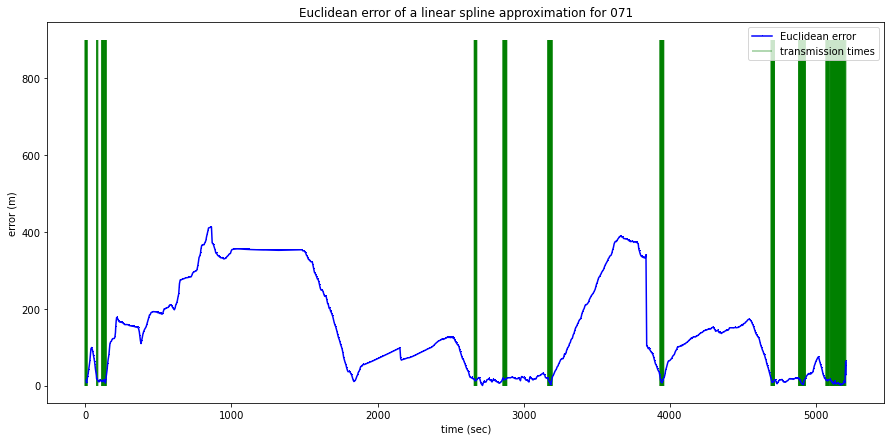

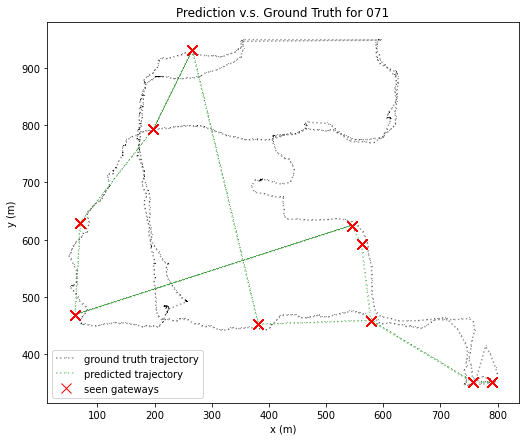

In [80]:
path_prediction('071', sample_period=1)

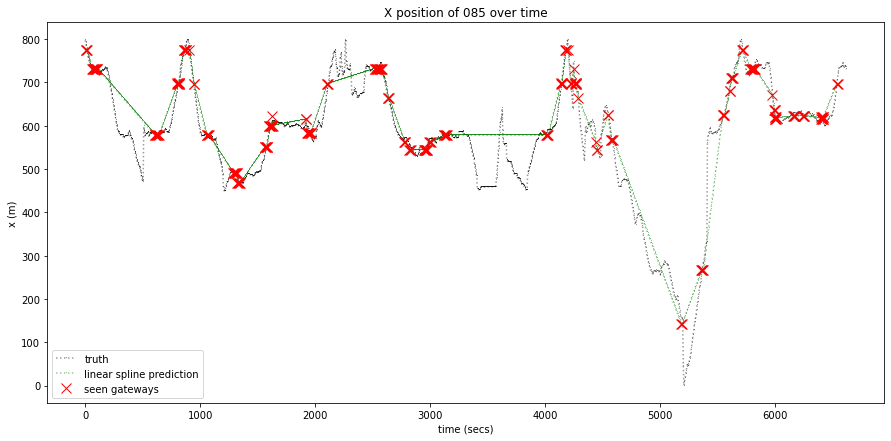

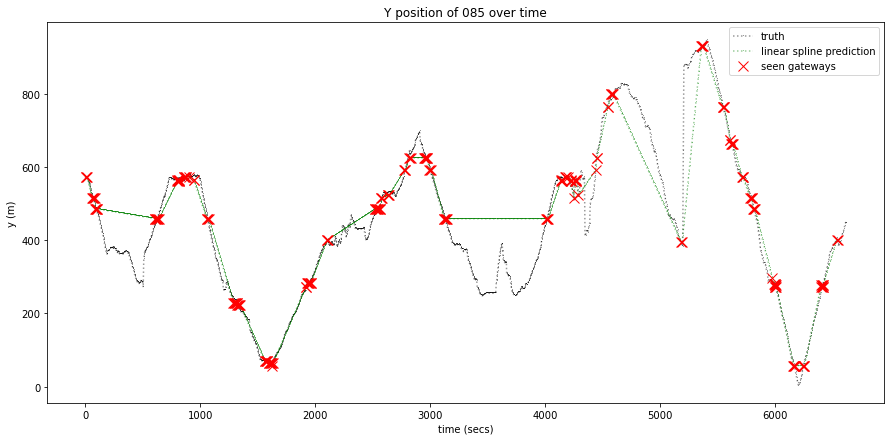

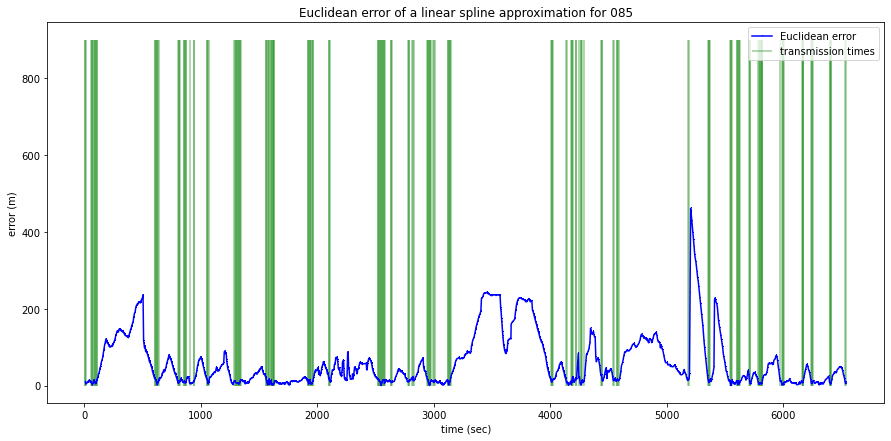

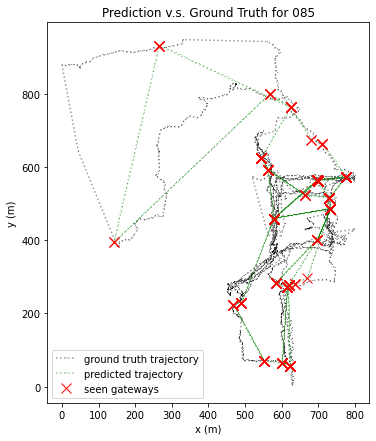

In [81]:
path_prediction('085')

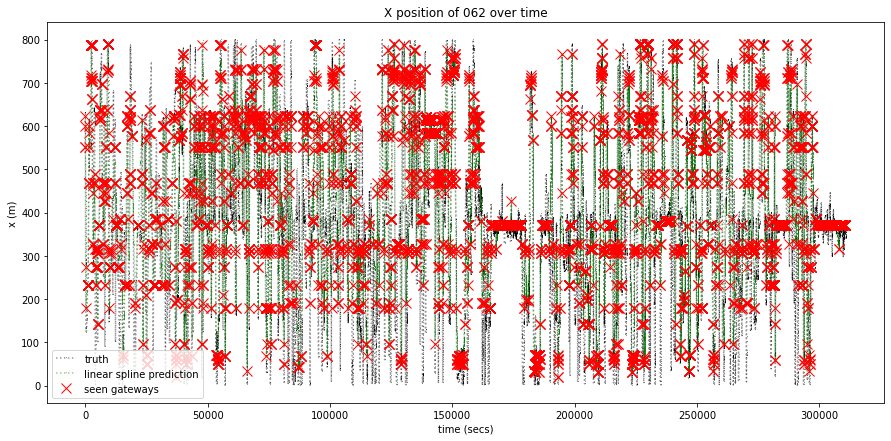

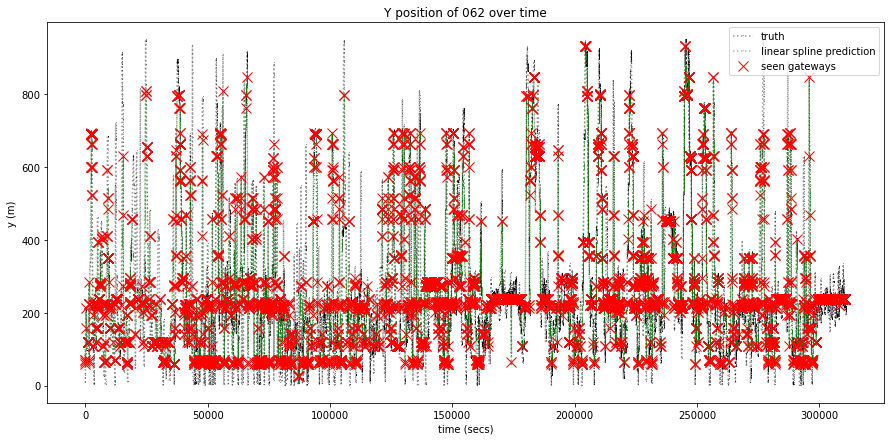

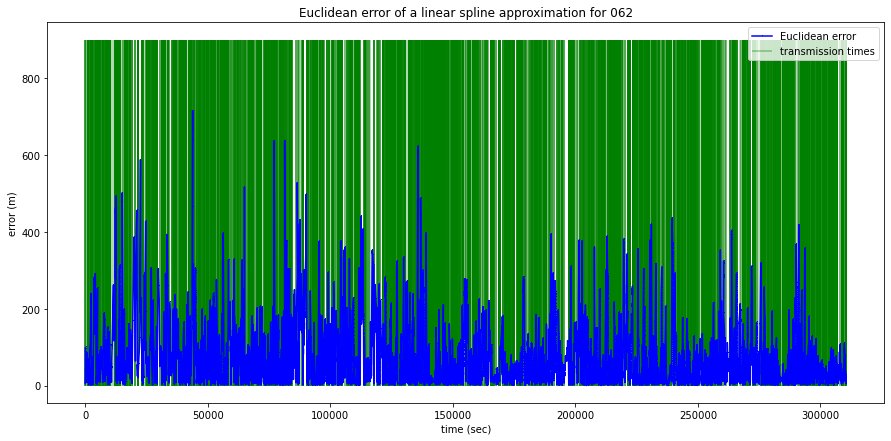

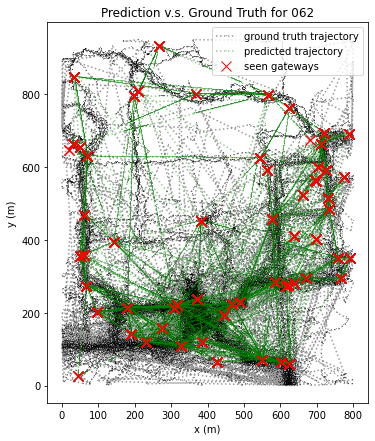

In [82]:
path_prediction('062')

In [84]:
np.median(np.array(err))

27.60192994358099

In [86]:
np.mean(np.array(err))

56.64934488930984

In [89]:
np.percentile(np.array(err), [0, 25, 50, 75, 90, 100]).astype(np.int)

<ipython-input-89-e538c5c11177>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.percentile(np.array(err), [0, 25, 50, 75, 90, 100]).astype(np.int)


array([  0,  12,  27,  50,  83, 692])

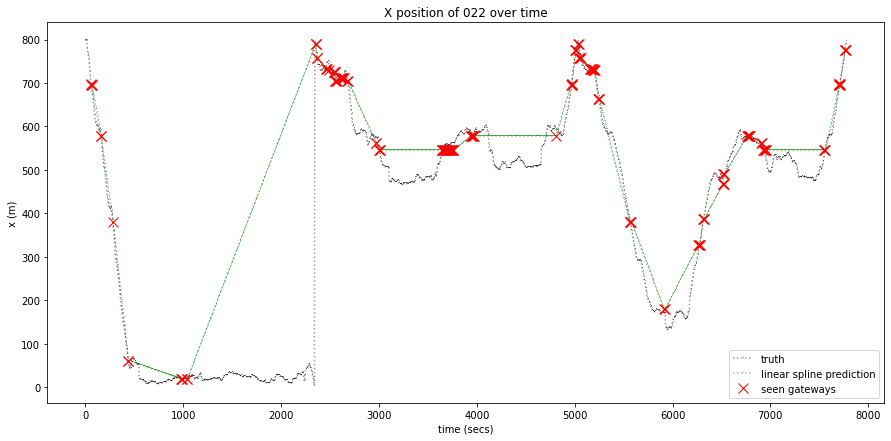

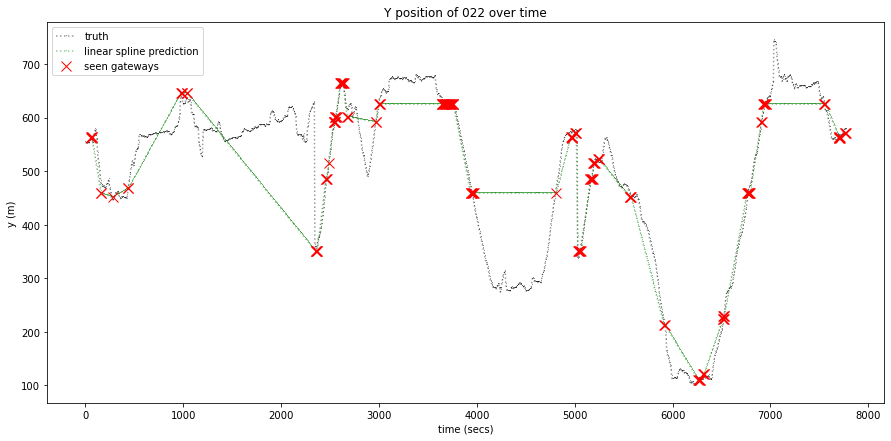

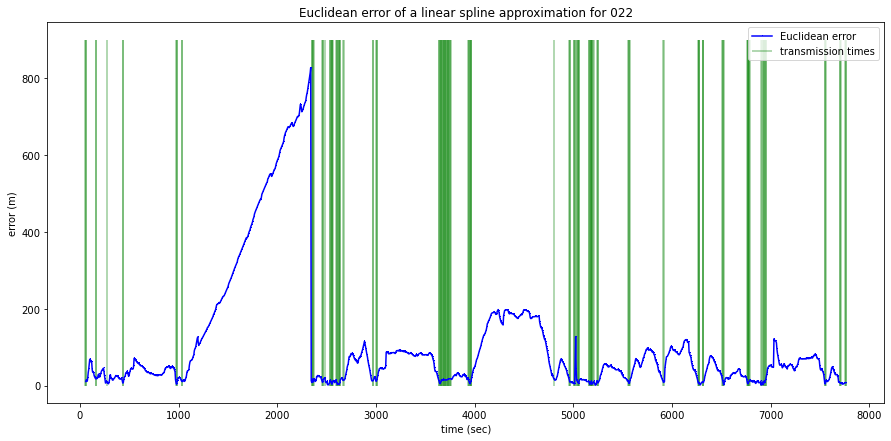

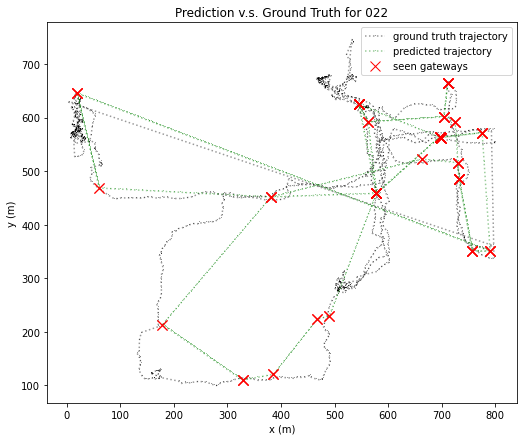

In [2]:
path_prediction('022')